# Part A : Deep Model

Look for file name : [0][First_training]DAI_ASSIGNMENT_2_Part_A.ipynb

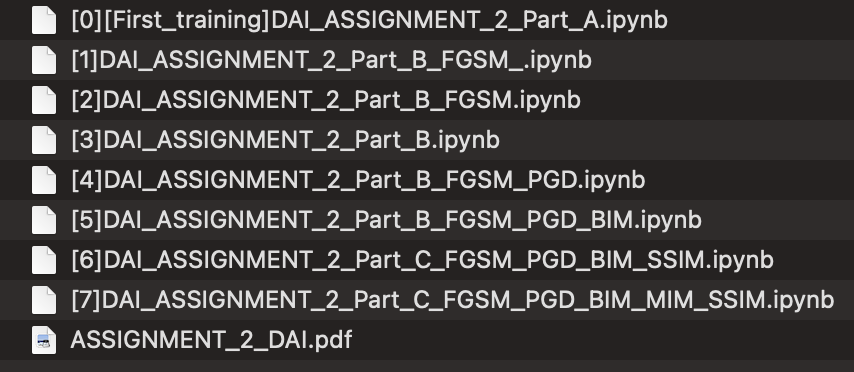

In [1]:
%tensorflow_version 2.x

In [2]:
# FGSM - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb

# Install bleeding edge version of cleverhans
# !pip install cleverhans==2.1.0
# !pip install cleverhans

from google.colab import drive 
drive.mount('/content/gdrive') 
import os
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2'
!ls
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images'
!ls
!find . -maxdepth 2 -type d
!find . -maxdepth 1 -mindepth 1 -type d -exec sh -c 'echo "{} : $(find "{}" -type f | wc -l)" file\(s\)' \;

!python --version
# !pip install cleverhans==2.1.0
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model




# import tensorflow as tf
# from tensorflow import keras
# from keras.layers import Input, Lambda, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
# from keras.models import Model, load_model
# from keras.applications.resnet50 import preprocess_input, decode_predictions
# from keras.applications import InceptionV3
# from keras.applications.resnet50 import preprocess_input
# from keras.applications.resnet50 import ResNet50
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.models import Sequential, Model
# from keras import Sequential
# from keras.layers import Dense, BatchNormalization
from keras import backend

# from cleverhans.utils_keras import KerasModelWrapper
# from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
#Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Install bleeding edge version of cleverhans

from builtins import range, input

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False
import cv2
from glob import glob
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import cleverhans
print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

Mounted at /content/gdrive
/content/gdrive/My Drive/DAI_ASSIGNMENT_2
Classes.py  Images  processed_images
/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images
'Copy of final_model.h5'	       final_model.h5		    test
'Copy of final_model_python2.h5'       final_model_python2.h5	    train
'Copy of final_model_python2_tf1.h5'   final_model_python2_tf1.h5
.
./train
./train/cane
./train/cavallo
./train/elefante
./train/farfalla
./train/gallina
./train/gatto
./train/mucca
./train/pecora
./train/ragno
./train/scoiattolo
./test
./test/cane
./test/cavallo
./test/elefante
./test/farfalla
./test/gallina
./test/gatto
./test/mucca
./test/pecora
./test/ragno
./test/scoiattolo
./train : 15702 file(s)
./test : 10477 file(s)
Python 3.6.9
  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-qofw4l0h/cleverhans
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-qofw4l0h/cleverhans
     |████████████████████████████████| 163kB 4.4MB/s 


In [4]:
h,w = (224,224)
batch = 32
train = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/train'
test = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test'

dataloader = ImageDataGenerator(
                                  preprocessing_function = preprocess_input,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )
train_loader = dataloader.flow_from_directory(
    train, 
    target_size = (h,w),
    batch_size = batch,
    class_mode= 'categorical',
    subset = 'training'
)

test_loader = dataloader.flow_from_directory(
    test, 
    target_size = (h,w),
    batch_size = 1,
    class_mode= 'categorical',
    subset = 'training'
)

print("testing example")
xtestex,ytestex = test_loader.next()
print(xtestex.shape)
print(ytestex.shape)
print("training example")
xtrainex, ytrainex = train_loader.next()
print(xtrainex.shape)
print(ytrainex.shape)
model = keras.models.load_model('final_model.h5')

Found 15702 images belonging to 10 classes.
Found 10477 images belonging to 10 classes.
testing example
(1, 224, 224, 3)
(1, 10)
training example
(32, 224, 224, 3)
(32, 10)


In [ ]:
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
base_model = ResNet50(weights=None,input_shape=(224,224,3),include_top=False)
base_model.summary()
new_model = base_model.output
new_model = AveragePooling2D(pool_size=(7, 7))(new_model)
new_model = Flatten(name="flatten")(new_model)
new_model = Dense(256, activation="relu")(new_model)
# new_model = Dropout(0.5)(new_model)
new_model = Dense(10, activation="softmax")(new_model)
model = Model(inputs=base_model.input, outputs=new_model)
# import torch
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(train_loader,epochs=20)
model.save('final_model_python2_tf1.h5')

In [5]:
test_loader

In [6]:
# image_data = []
# for x in test_loader:
#   print(x[0][0].shape)
#   break

len(test_loader)

10477

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dir = "/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test"
classes = ["cane",
          "cavallo",
          "elefante",
          "farfalla",
          "gallina",
          "gatto",
          "mucca",
          "pecora",
          "ragno",
          "scoiattolo"]

data = []
for clas in classes:
  path = os.path.join(dir, clas)
  label = classes.index(clas)
  print(label)
  for img in os.listdir(path): # Gets the list of all files in the directory
    imagepath = os.path.join(path,img)
    # print(str(imagepath))
    s_image = cv2.imread(imagepath, 1)
    try:
      s_image = cv2.resize(s_image,(224,224))
      image_array = np.array(s_image).flatten()
      data.append([image_array, label])
    except Exception as e:
      pass
    
print(len(data))



0
1
2
3
4
5
6
7
8
9
10477


In [41]:
np.array(data[0][0]).shape

(150528,)

In [42]:
X_features = []
Y_labels = []

for x,y in data:
  X_features.append(x)
  Y_labels.append(y)
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.01)

xdata = X_train
ylabels = Y_train
print("Sizes of data and labels")
print(len(xdata))
print(len(ylabels))

Sizes of data and labels
10372
10372


In [43]:
xdata = np.array(xdata)
ylabels = np.array(ylabels)
xdata = xdata.reshape(10372,224,224,3)

In [44]:
print("Sizes of data and labels")
print((xdata.shape))
print((ylabels.shape))

Sizes of data and labels
(10372, 224, 224, 3)
(10372,)


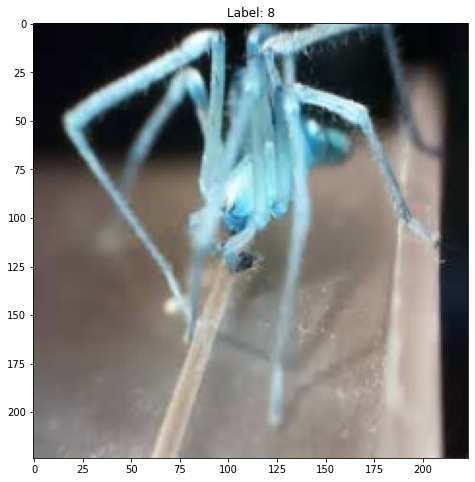

In [48]:
# Import the attack

from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

random_index = np.random.randint(xdata.shape[0])

original_image = xdata[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,224,224,3))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = ylabels[random_index]
original_label = np.reshape(original_label, (1,)).astype('int64') # Give label proper shape and type for cleverhans

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(original_image, (224,224,3)))
plt.title("Label: {}".format(original_label[0]))

plt.show()

# Part B : Attacks


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


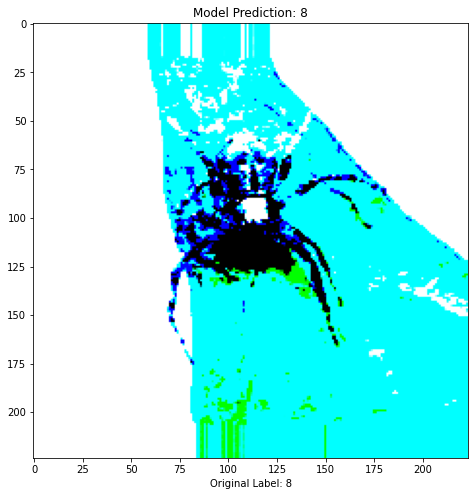

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


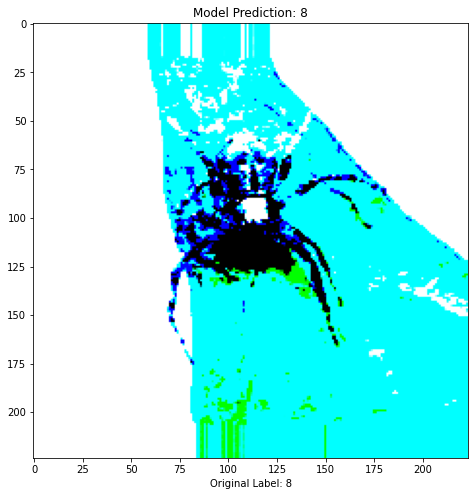

    1/10000 [..............................] - ETA: 57:47:56test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 100.000
test acc on PGD adversarial examples (%): 100.000


In [69]:
eps=0.1
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(10000)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)

  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(np.argmax(y_pred_fgm)))
  plt.xlabel("Original Label: {}".format(y[0]))

  plt.show()

  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(np.argmax(y_pred_fgm)))
  plt.xlabel("Original Label: {}".format(y[0]))

  plt.show()

  progress_bar_test.add(x.shape[0])
  break
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


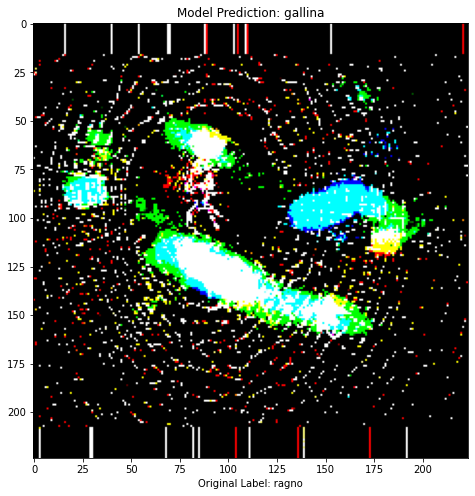

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


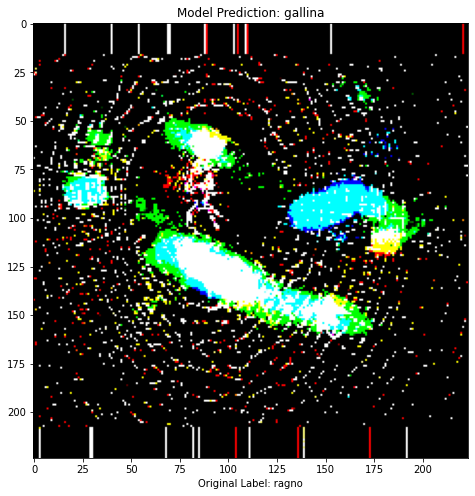

  1/100 [..............................] - ETA: 34:23test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 0.000


In [102]:
eps=0.7
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)

  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()

  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))

In [114]:
# basic_iterative_method, momentum_iterative_method
# ref: https://github.com/Fuu3214/Grad_Proj/blob/4adc3147fdaa5a0acfca61c67188608b07880048/attack_and_generate_attr.ipynb
# https://github.com/Carco-git/CW_Attack_on_MNIST/blob/master/CW_Attack_l2.ipynb
# https://github.com/ocatak-zz/adversarial-ml-training/blob/5e6984a28e9375fb40362b17ffd931f0b8da2e70/adversarial-machine-learning-attacks-and-mitigations.ipynb

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


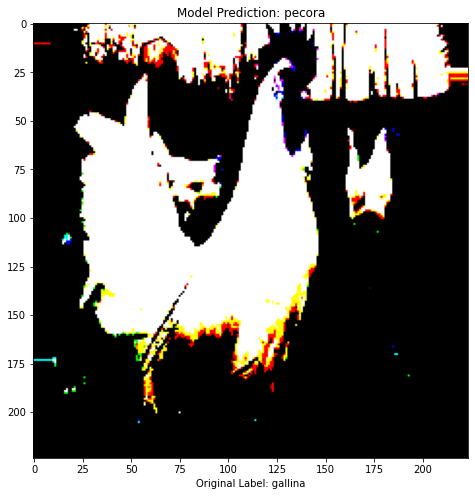

PGD


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


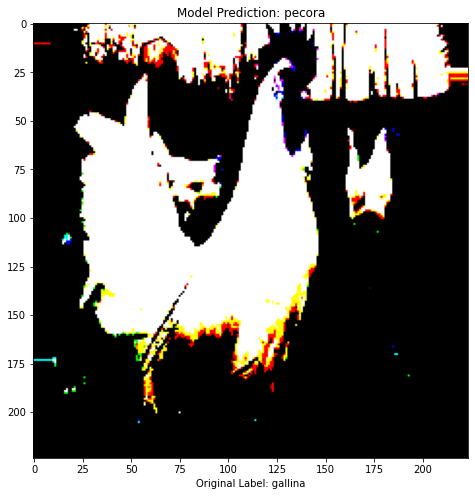

BIM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


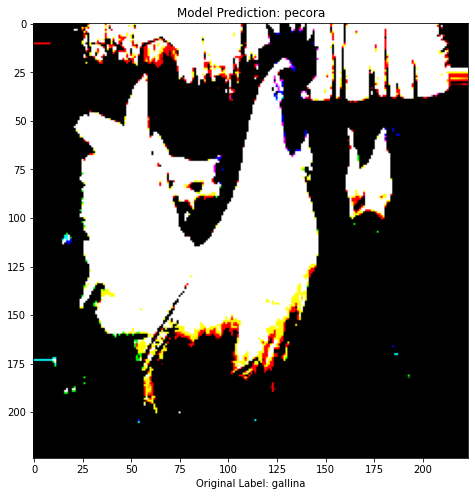

  1/100 [..............................] - ETA: 1:05:53test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 0.000
test acc on BIM adversarial examples (%): 0.000


In [127]:
eps=0.7
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python
# 1. Import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

def ssim(imgA, imgB, attack_name)
  # 2. Load the two input images
  imageA = imgA
  imageB = imgb

  # 3. Convert the images to grayscale
  grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

  # 4. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  # 5. You can print only the score if you want
  print("SSIM: {}".format(score))
  print("for"+ str(attack_name))
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
test_acc_bim = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_fgm,"FGM")
  # PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD
  print("PGD")
  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_pgd,"PGD")
  # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM 

  print("BIM")
  x_bim = basic_iterative_method(model,x,eps,0.01,40,norm=np.inf)
  y_pred_bim = model(x_bim)
  test_acc_bim(y, y_pred_bim)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_bim, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_bim,"BIM")

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))
print('test acc on BIM adversarial examples (%): {:.3f}'.format(test_acc_bim.result() * 100))

SSIM
c. Report SSIM(Structural Similarity) for the predictions. Infer ​[ 10 Marks]

# Part C: SSIM

for projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


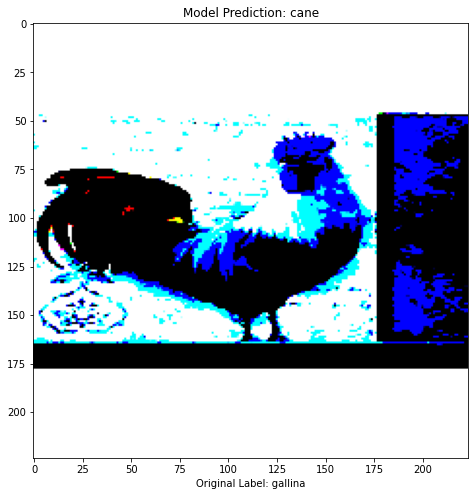

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.4033331655939359
forFGM
PGD


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


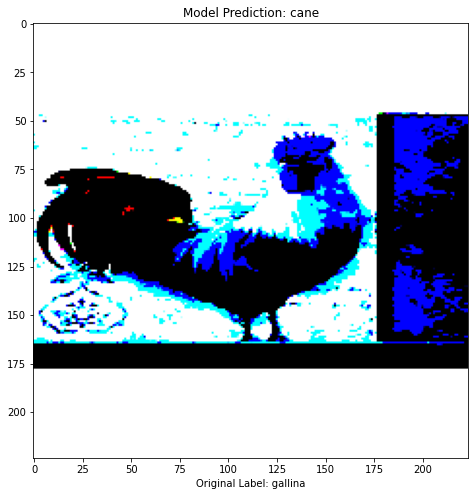

SSIM: 0.3631802415370079
forPGD
BIM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


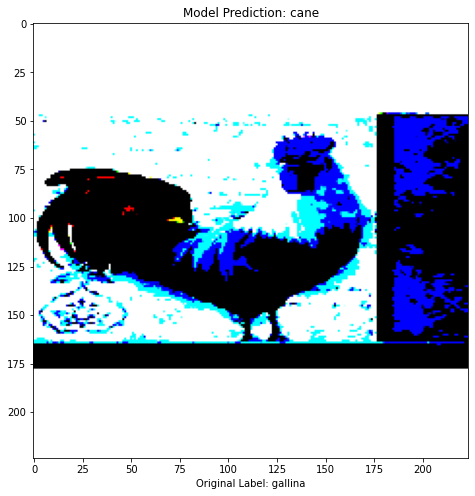

SSIM: 0.3631802415370079
forBIM
  1/100 [..............................] - ETA: 1:07:12test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 0.000
test acc on BIM adversarial examples (%): 0.000


In [153]:
eps=0.7
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python
# 1. Import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from PIL import Image
def ssim(imgA, imgB, attack_name):
  # get image from numpy array
  imageA = Image.fromarray(imgA[0], 'RGB')
  imageB = Image.fromarray(np.array(imgB[0]), 'RGB')

  # 3. Convert the images to grayscale
  grayA = cv2.cvtColor(np.float32(imageA),cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(np.float32(imageB),cv2.COLOR_RGB2GRAY)

  # 4. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  # 5. You can print only the score if you want
  print("SSIM: {}".format(score))
  print("for"+ str(attack_name))



from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
test_acc_bim = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_fgm,"FGM")
  # PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD
  print("PGD")
  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_pgd)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_pgd,"PGD")
  # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM 

  print("BIM")
  x_bim = basic_iterative_method(model,x,eps,0.01,40,norm=np.inf)
  y_pred_bim = model(x_bim)
  test_acc_bim(y, y_pred_bim)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_bim, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_bim)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_bim,"BIM")

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))
print('test acc on BIM adversarial examples (%): {:.3f}'.format(test_acc_bim.result() * 100))

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


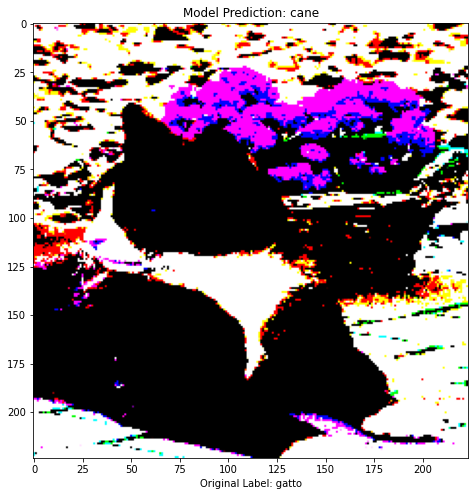

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.30289608437667287
forFGM
PGD


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


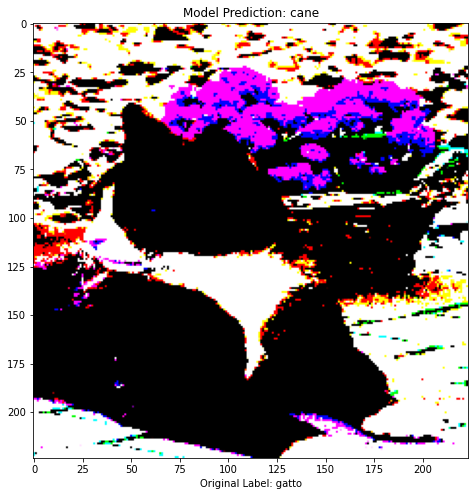

SSIM: 0.3429613126004061
forPGD
MIM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


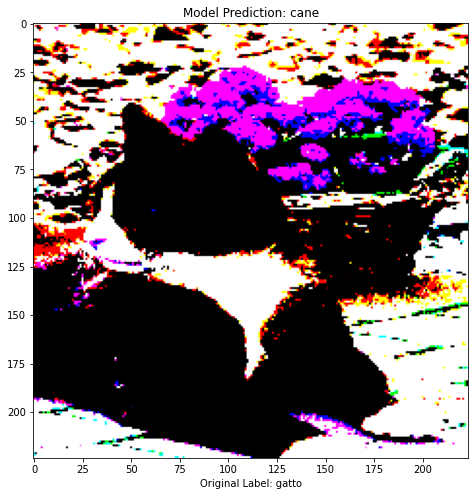

SSIM: 0.3354730333004546
forMIM
  1/100 [..............................] - ETA: 1:07:34test acc on clean examples (%): 0.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 0.000
test acc on MIM adversarial examples (%): 0.000


In [155]:
eps=0.7
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python
# 1. Import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from PIL import Image
def ssim(imgA, imgB, attack_name):
  # get image from numpy array
  imageA = Image.fromarray(imgA[0], 'RGB')
  imageB = Image.fromarray(np.array(imgB[0]), 'RGB')

  # 3. Convert the images to grayscale
  grayA = cv2.cvtColor(np.float32(imageA),cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(np.float32(imageB),cv2.COLOR_RGB2GRAY)

  # 4. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  # 5. You can print only the score if you want
  print("SSIM: {}".format(score))
  print("for"+ str(attack_name))



from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
test_acc_MIM = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_fgm,"FGM")
  # PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD
  print("PGD")
  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_pgd)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_pgd,"PGD")
  # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM 

  print("MIM")
  x_MIM = momentum_iterative_method(model,x,eps,0.01,40,norm=np.inf)
  y_pred_MIM = model(x_MIM)
  test_acc_MIM(y, y_pred_MIM)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_MIM, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_MIM)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_MIM,"MIM")

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))
print('test acc on MIM adversarial examples (%): {:.3f}'.format(test_acc_MIM.result() * 100))